# AS.030.421 HW 7
## Sam Dawley
## Due: 11/3/2021

Revised:
- Criteria for removing outliers in part 1

$\quad$ Data visualization is the primary means by which we can communicate data with one another. In fact, effective methods for illustrating data has been shown to improve people's ability to derive results and draw accurate conclusions from different types of data sets.

$\quad$ In this project we've been tasked with visualizing and quantifying the efficacy of different types of sunscreen and how accurate the SPF (sun protection factor) claims are. Given the absorbance spectra of different brands of sunscreen, by visualizing the data and doing a small bit of analysis we can determine the correlation between SPF and UV absorption. One thing we might be interested in is why even bother measuring how well SPF correlates with UV absorption. Personally, I don't know. However, the smart people at the Skin Cancer Foundation do (https://www.skincancer.org/):

### Why is Ultraviolet Radiation Bad?
$\quad$ Ultraviolet (UV) radiation is part of the natural energy produced by the sun. On the electromagnetic spectrum, UV light has shorter wavelengths than visible light, so your eyes can’t see UV, but your skin can feel it. Tanning beds also emit UV radiation. There are a few... 'fun' properties of UV radiation that scientists determined a long time ago:
- UV radiation damages your skin
- It gives you cancer
- The majority of melanomas are caused by UV radiation

$\quad$ This data set measured SPF effectiveness across a wide range of wavelengths. In particular, it measured how well different SPFs worked for both *UVA* and *UVB* radiation, two different types of UV light. Here are a few differences between the types of radiation:

- UVA Radiation,
    - Has a longer wavelength and is associated with skin aging.
    - Causes tanning and is often used in tanning beds. However, there is no such thing as a safe or healthy tan. My friend Mary goes to tanning salons. I should pass along this information to her.
    - Is connected to the ''broad-spectrum protection'' we see on sunscreen bottles
    
- UVB Radiation,
    - Has a shorter wavelength and is associated with skin burning. 
    - Penetrates and damages the outermost layers of your skin. Overexposure causes suntan, sunburn and, in severe cases, blistering.
    - Is connected to SPF on sunscreen labels. The SPF number tells you how long the sun’s radiation (including some of the UVA) would take to redden your skin when using that product compared to the time without sunscreen.
    
$\quad$ While UVA and UVB rays differ in how they affect the skin, they both do harm. Unprotected exposure to UVA and UVB damages the DNA in skin cells, producing genetic defects, or mutations, that can lead to skin cancer (as well as premature aging.) These rays can also cause eye damage, including cataracts and eyelid cancers.

$\quad$ If we didn't already have a reason to do some cool science, now we do.

### 1. 

$\quad$ The first thing to do with the sample data is to determine which (if any) poorly represent the true absorbance spectrum of the sunscreen sample. That is, let's try and find the outliers of the data. Each spectrum was plotted on a subplot and the area beneath the curve was colored. This representation of the data offers a crude yet effective way of determining which sample data sets were poorly collected and would hurt our data analysis later. The data sets that I thought poorly represented the data were those in which *negative absorbances* were collected. This was the primary criteria I used for deciding which samples should be removed from the analysis. 

<IPython.core.display.Javascript object>


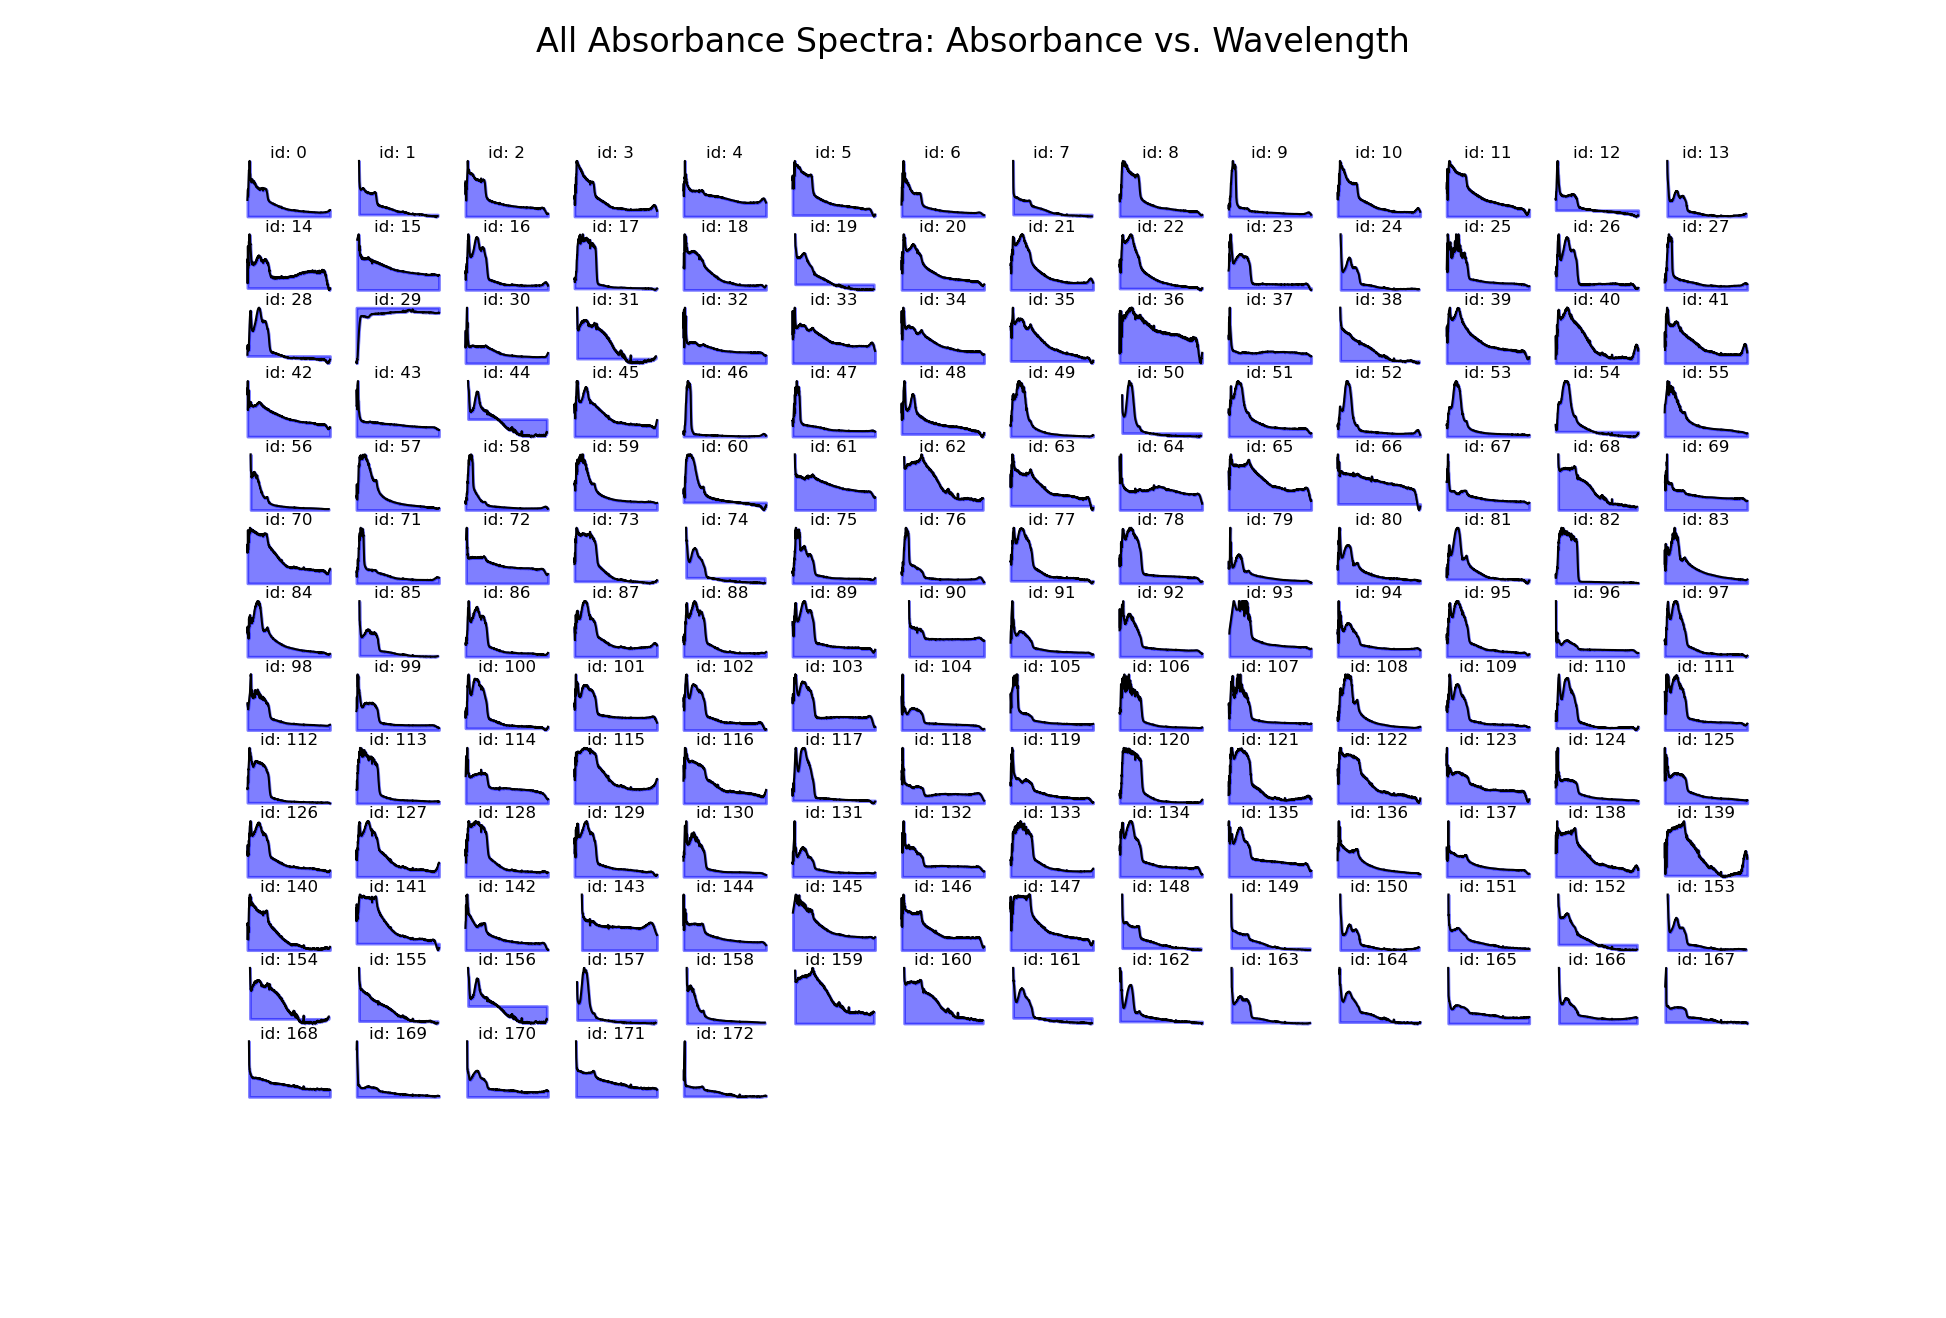

In [1]:
%matplotlib notebook
import os, csv
import matplotlib.pyplot as plt
import numpy as np

# Get current working directory
cwd = os.getcwd()

# Attain list of csv files
files = os.listdir(cwd + '/Sunscreen-2019/')
csvs = [f for f in files if f.endswith('.csv')]
csvs.sort()

# Create subplots
m = int(np.floor(np.sqrt(np.size(csvs)))) # temporary variable
fig, ax = plt.subplots(m+1, m+1, sharex=True)
fig.suptitle('All Absorbance Spectra: Absorbance vs. Wavelength')

# Turning off axis to make it look pretty
for i in range(len(ax)):
    for j in range(len(ax)):
        ax[i][j].axis('off')

# Dictionary for font parameters in plot
fontdict = {'fontsize':6}

# Dictionary of data
# 0 index = wavelengths
# 1 index = relative absorbances
data = {}

# Inputting and plotting data
for i,name in enumerate(csvs):
    with open(cwd + '/Sunscreen-2019/{}'.format(name), 'r') as f:
        dat = csv.reader(f, delimiter=',', quotechar='|')
        wavelength = []; absorption = []
        for row in dat:
            wavelength.append(float(row[0])); absorption.append(float(row[1])) 
        data[name] = wavelength, absorption
            
    # Choosing axes to plot the data
    # Coloring beneath the curve to more clearly show the area under the curve
    ax[int(np.floor(i/(m+1)))][int(i%(m+1))].plot(wavelength, absorption, c='k', lw=0.75)
    ax[int(np.floor(i/(m+1)))][int(i%(m+1))].fill_between(wavelength,absorption, color='b', alpha=0.5)
    ax[int(np.floor(i/(m+1)))][int(i%(m+1))].set_title('id: {}'.format(i), fontdict=fontdict, pad=0)

### 2.

$\quad$ With the outliers identified we can remove them from the data set. Now, we can begin to measure the ultraviolet absorption of the light across different ranges of wavelength corresponding to different types of UV light (UVA and UVB). UVA light is defined on the range of wavelengths 280-315 nm.

In [19]:
# Here's the list of samples I think I should probably remove at some point
# The list will always be the same (thankfully) because I sorted the 
# list of csv files after importing
ids2remove = [19, 28, 29, 31, 44, 50, 54, 60, 74, 152, 154, 156, 157, 161]

In [20]:
# This is where I'll store the list with the outliers removed
csvs = [m for m in csvs if csvs.index(m) not in ids2remove]
# I printed the length of the csv list before and after to make sure the filter was actually applied

$\quad$ Ultimately our goal is to correlate SPF factor to UVA absorbance. So, the first thing we need to do is extract the SPF from the filename. Hence, we create the function `find_SPF`.

In [6]:
def find_SPF(filename):
    '''
    This is a function which determines the SPF associated with a sample.
    Only pass .csv files please :)
    
    Parameters
    ----------
    filename (str) = name of csv file. Should have SPF information in the first part of the filename 
    
    Returns
    -------
    SPF of sunscreen sample (float)
    '''
    # Get the first part of the filename - This contains the things we're interested in
    interesting = filename.split('-')[0]
    ints = []
    
    # Here we iterate through the beginning of the filename to find the integers
    # If the element is in fact an integer, append it to the list of candidates
    for i in interesting:
        try:
            ints.append(int(i))
        except:
            continue
    
    # The filenames in the sample are written in multiple ways, but one way to capture the SPF
    # without fail every time is to drop the final integer in the name IF there are more than 2 integers
    # in the file name
    if len(ints) > 2:
        ints.pop(-1)
        
    # Here I reverse the list for ease of creating the SPF from the list of integers and
    # set the SPF to zero
    # I add to the SPF value by utilizing the base 10 system of numbering
    ints.reverse(); spf = 0
    for ii,n in enumerate(ints):
        spf += n*10**(ii)
    return float(spf)

#print(find_SPF(csvs[94]))

$\quad$ At a later stage in the data analysis process we're asked to draw conclusions about the data set as a whole. To do this we'll need a list of all of the SPFs measured. `num_SPFs` finds all the different SPFs we measured.

In [7]:
def num_SPFs(filelist):
    '''
    This is a function which determines the number of different SPF values we measured.
    Only pass .csv files please :)
    
    Parameters
    ----------
    filelist (list) = list of csv files. Should have SPF information in the first part of the filename 

    Returns
    -------
    (Sorted) List of different SPF values in the collected data
    '''
    # Initialize a list of SPF values
    spfs = []
    
    # Iterate through each name in the list of files and determine the SPF measured in the file
    # We can use the function `find_SPF` we made earlier! 
    for filename in filelist:
        spf = find_SPF(filename)
        
        # Append to list only if we haven't already added it
        # We're interested in the SPF, not the number of times we measured the SPF, after all
        if spf not in spfs:
            spfs.append(spf)
            
    # Sort the list
    spfs.sort()
        
    return spfs

$\quad$ To analyze the absorbtion of an individual file over some range of wavelengths I considered the average absorbance over the (relatively small) range of wavelengths for both types of ultraviolet light we're interested in measuring. The function `avg_absorption` takes a data file and a range of wavelengths and returns the average absorbance of the data over that wavelength.

In [8]:
def avg_absorption(filename, lambda_range):
    '''
    This is a function which determines the average absorbance of a sample over a specified wavelength range
    Only pass .csv files please :)
    
    Parameters
    ----------
    filename (str) = name of csv file. Should have SPF information in the first part of the filename 
    lambda_range (tuple) = tuple of (min, max) wavelength values to average absorbances 
    
    Returns
    -------
    Average absorbance across given range of wavelengths (float)
    
    '''
    # Finding lower/upper bound for wavelength range
    lb, ub = lambda_range
    Sam_Dawley = True
    
    # Determining indices of this wavelength range in data set for sample
    # If the absorption at the desired wavelength wasn't recorded, continually
    # add +1 to the lower bound on the wavelength until we find the largest possible
    # wavelength which is closest to the desired wavelength
    # 'NA1003-film-206.csv' doesn't have 280 as a wavelength, so that's why 
    # I had to make this more complicated than it needed to be
    while Sam_Dawley == True:
        try:
            id_lb, id_ub = (data[filename][0]).index(lb), (data[filename][0]).index(ub)
            Sam_Dawley = False
        except:
            if lb not in data[filename][0]:
                lb += 1

    # Averaging the absorptions on the specified wavelength range of the sample data
    return float(np.average([v for v in data[filename][1][id_lb:id_ub]]))


$\quad$ Using `avg_absorption` we can find the average absorption of *all files with the same SPF* over a specified range of wavelengths. This will be a useful tool for comparing the data later when we're correlating SPF to UV absorbance for all of the collected data.

In [10]:
def avg_SPF_absorption(filelist, lambda_range, SPF):
    '''
    This is a function which computes the average absorbance for all samples with a 
    particluar SPF over a specified range of wavelengths. Only pass .csv files please :)
    
    Parameters
    ----------
    filelist (list) = list of csv files. Should have SPF information in the first part of each filename 
    lambda_range (tuple) = tuple of (min, max) wavelength values to average absorbances 
    SPF (int) = particular SPF we want to average on
    
    Returns
    -------
    Average absorbance for a particular SPF across given range of wavelengths (float)
    
    '''
    # Cumulative list of averages to do statistics on later
    cumlist = []
    
    # Iterate through each data set in the list of files
    # Use the function `avg_absorption` we defined above!
    for name in filelist:
        if find_SPF(name) == SPF:
            cumlist.append(avg_absorption(name, lambda_range))
        
    # Averaging the absorptions on the specified wavelength range of the sample data
    return np.average(cumlist), np.std(cumlist)

$\quad$ Here I make sure that all of my functions that may return errors are working properly. They are!

In [21]:
for f in range(len(csvs)):
    try:
        avg_absorption(csvs[f], (280, 315))
        avg_absorption(csvs[f], (315, 400))
        avg_SPF_absorption(csvs, (280, 315), 100)
        avg_SPF_absorption(csvs, (315, 400), 100)
    except:
        print('{} didn\'t work for some reason'.format(csvs[f]))

$\quad$ Now for the fun part where we get to actually see what all of the work above was for. Below we plot the average absorbances for each sample using `avg_absorption` to loosely illutrate the correlation between SPF and UVA absorbance. To make the results slightly more clear, `avg_SPF_absorption` was utilized for each SPF found by `num_SPFs` and the mean for each factor was plotted as well with associated error bars. Unsurprisingly, the mean and error bars line up very well with the individual data points themselves. However, we're in the business of data visualization and I feel that this plot offers a more clear way of seeing the correlation between SPF and absorbance for all of the data sets.

<IPython.core.display.Javascript object>


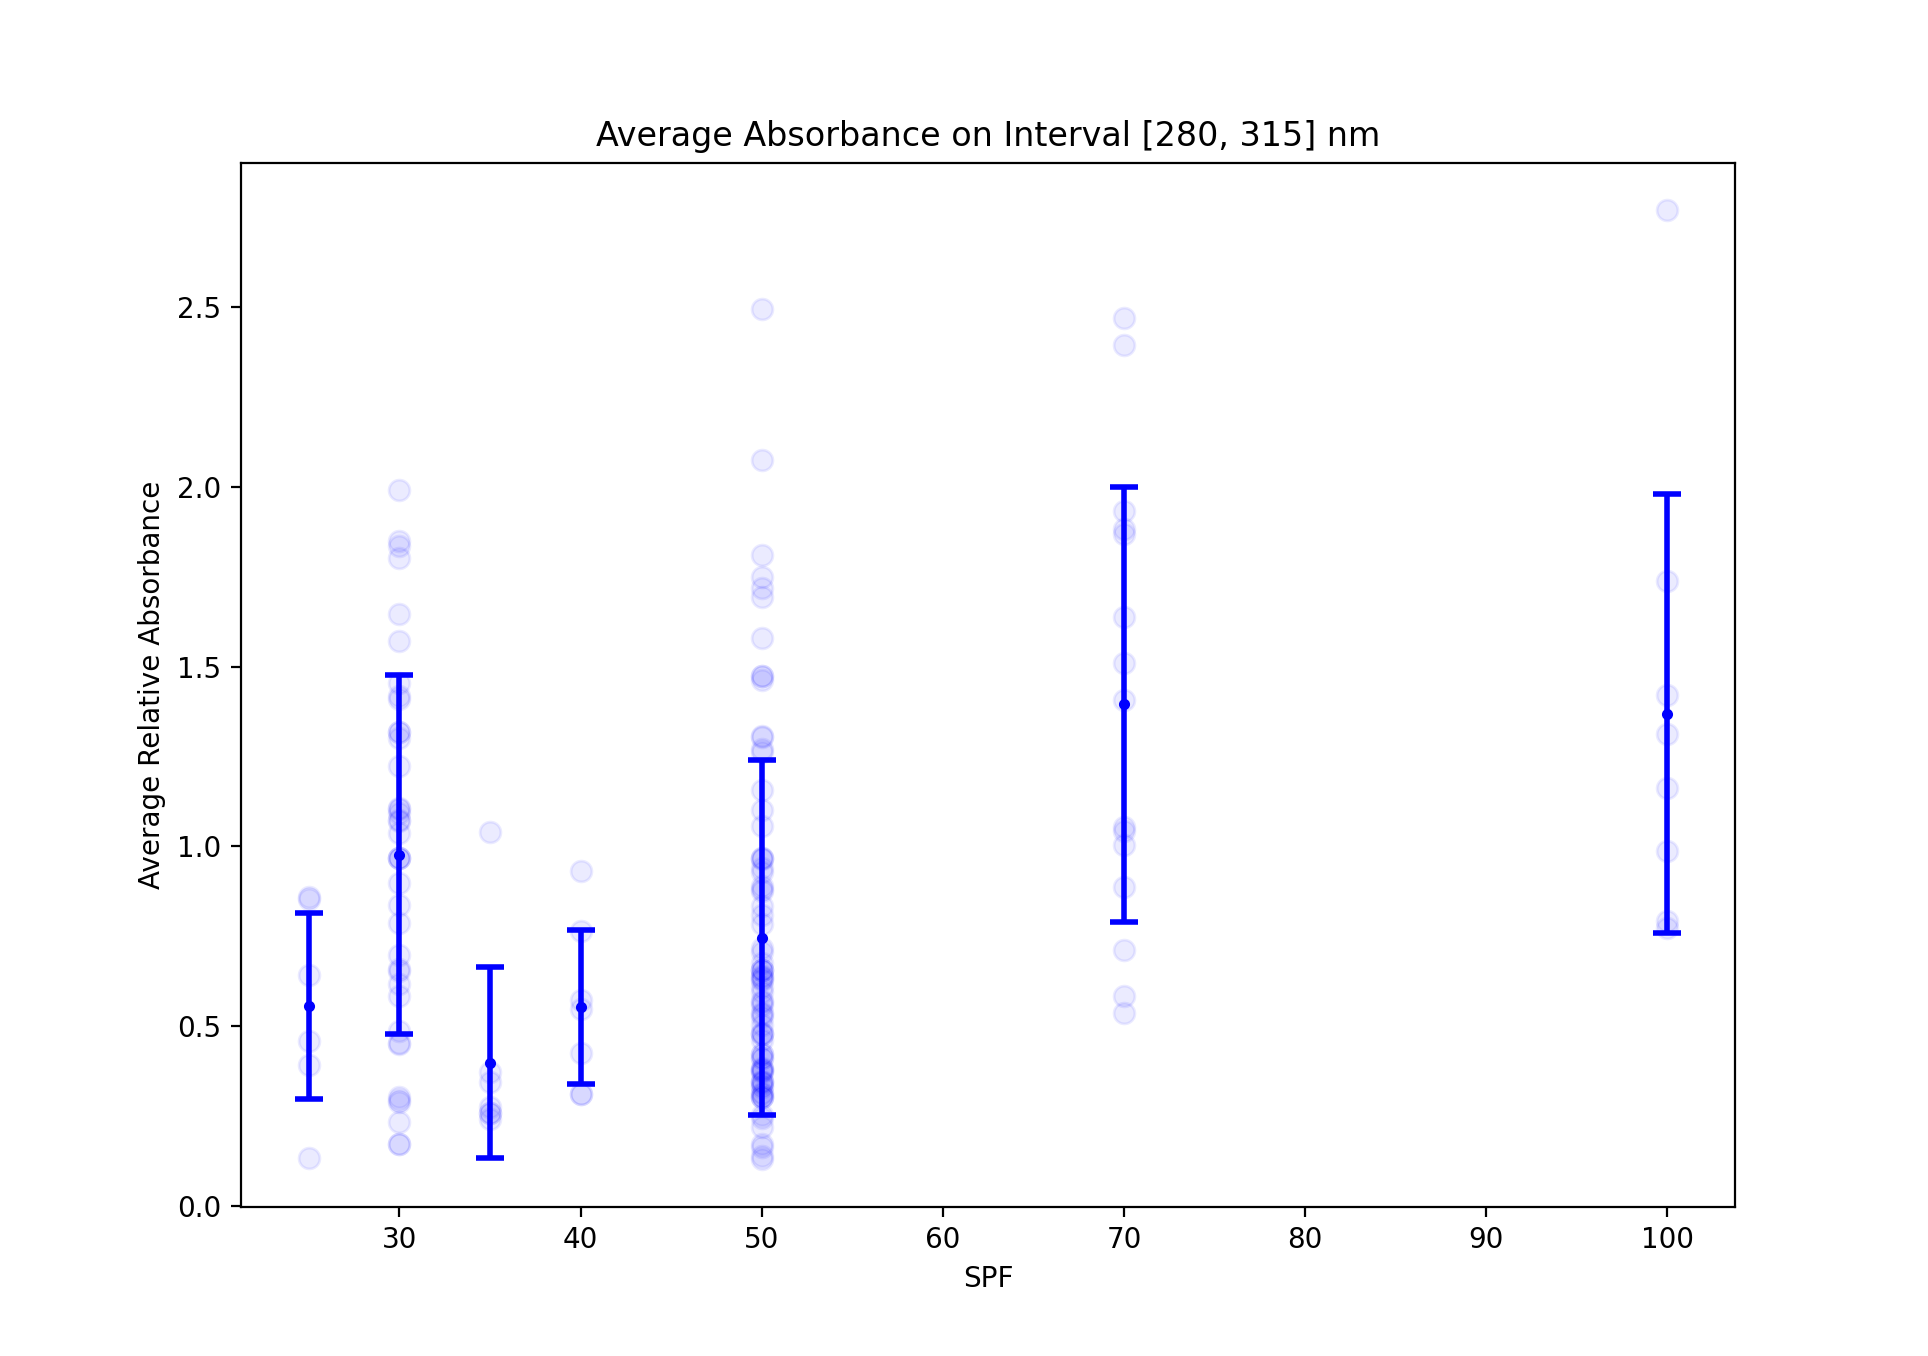

Text(0, 0.5, 'Average Relative Absorbance')

In [15]:
# Creating new visualization for absorbance on nm=[280, 315]
fig = plt.figure()

# Wavelength range
m = 280; n = 315

# Iterating through list of data sets and plotting
for f in csvs:
    try:
        x = find_SPF(f)
        y = avg_absorption(f, (m, n))
        plt.plot([x], [y], marker='o', c='b', markersize=7.5, alpha=0.08)
    except:
        print(f)

# Plotting the mean and error bars
for SPF in num_SPFs(csvs):
    x2 = SPF
    y2 = avg_SPF_absorption(csvs, (m,n), SPF)[0]
    plt.plot(x2, y2, marker='o', c='b', markersize=3)
    plt.errorbar(x2, y2, yerr=avg_SPF_absorption(csvs, (m,n), SPF)[1],
                 capsize=5, c='b', elinewidth=2, capthick=2)

# Making the plot informative
plt.title('Average Absorbance on Interval [{0}, {1}] nm'.format(m, n))
plt.xlabel('SPF')
plt.ylabel('Average Relative Absorbance')

$\quad$ In the data above there is a positive correlation between SPF and average UVA absorbance. This can be seen by considering the mean absorbances for each SPF. Interestingly, there doesn't seem to be a large positive correlation at lower SPF values, though.

### 3.

$\quad$ We'll follow the same procedure as we did for determing the correlation between SPF and UVA absorbance for determing a correlation between SPF and UVB absorbance. The hard work has already been done so I pretty much just copied and pasted the code from above, changing small things such as the range of wavelengths and plot title.

<IPython.core.display.Javascript object>


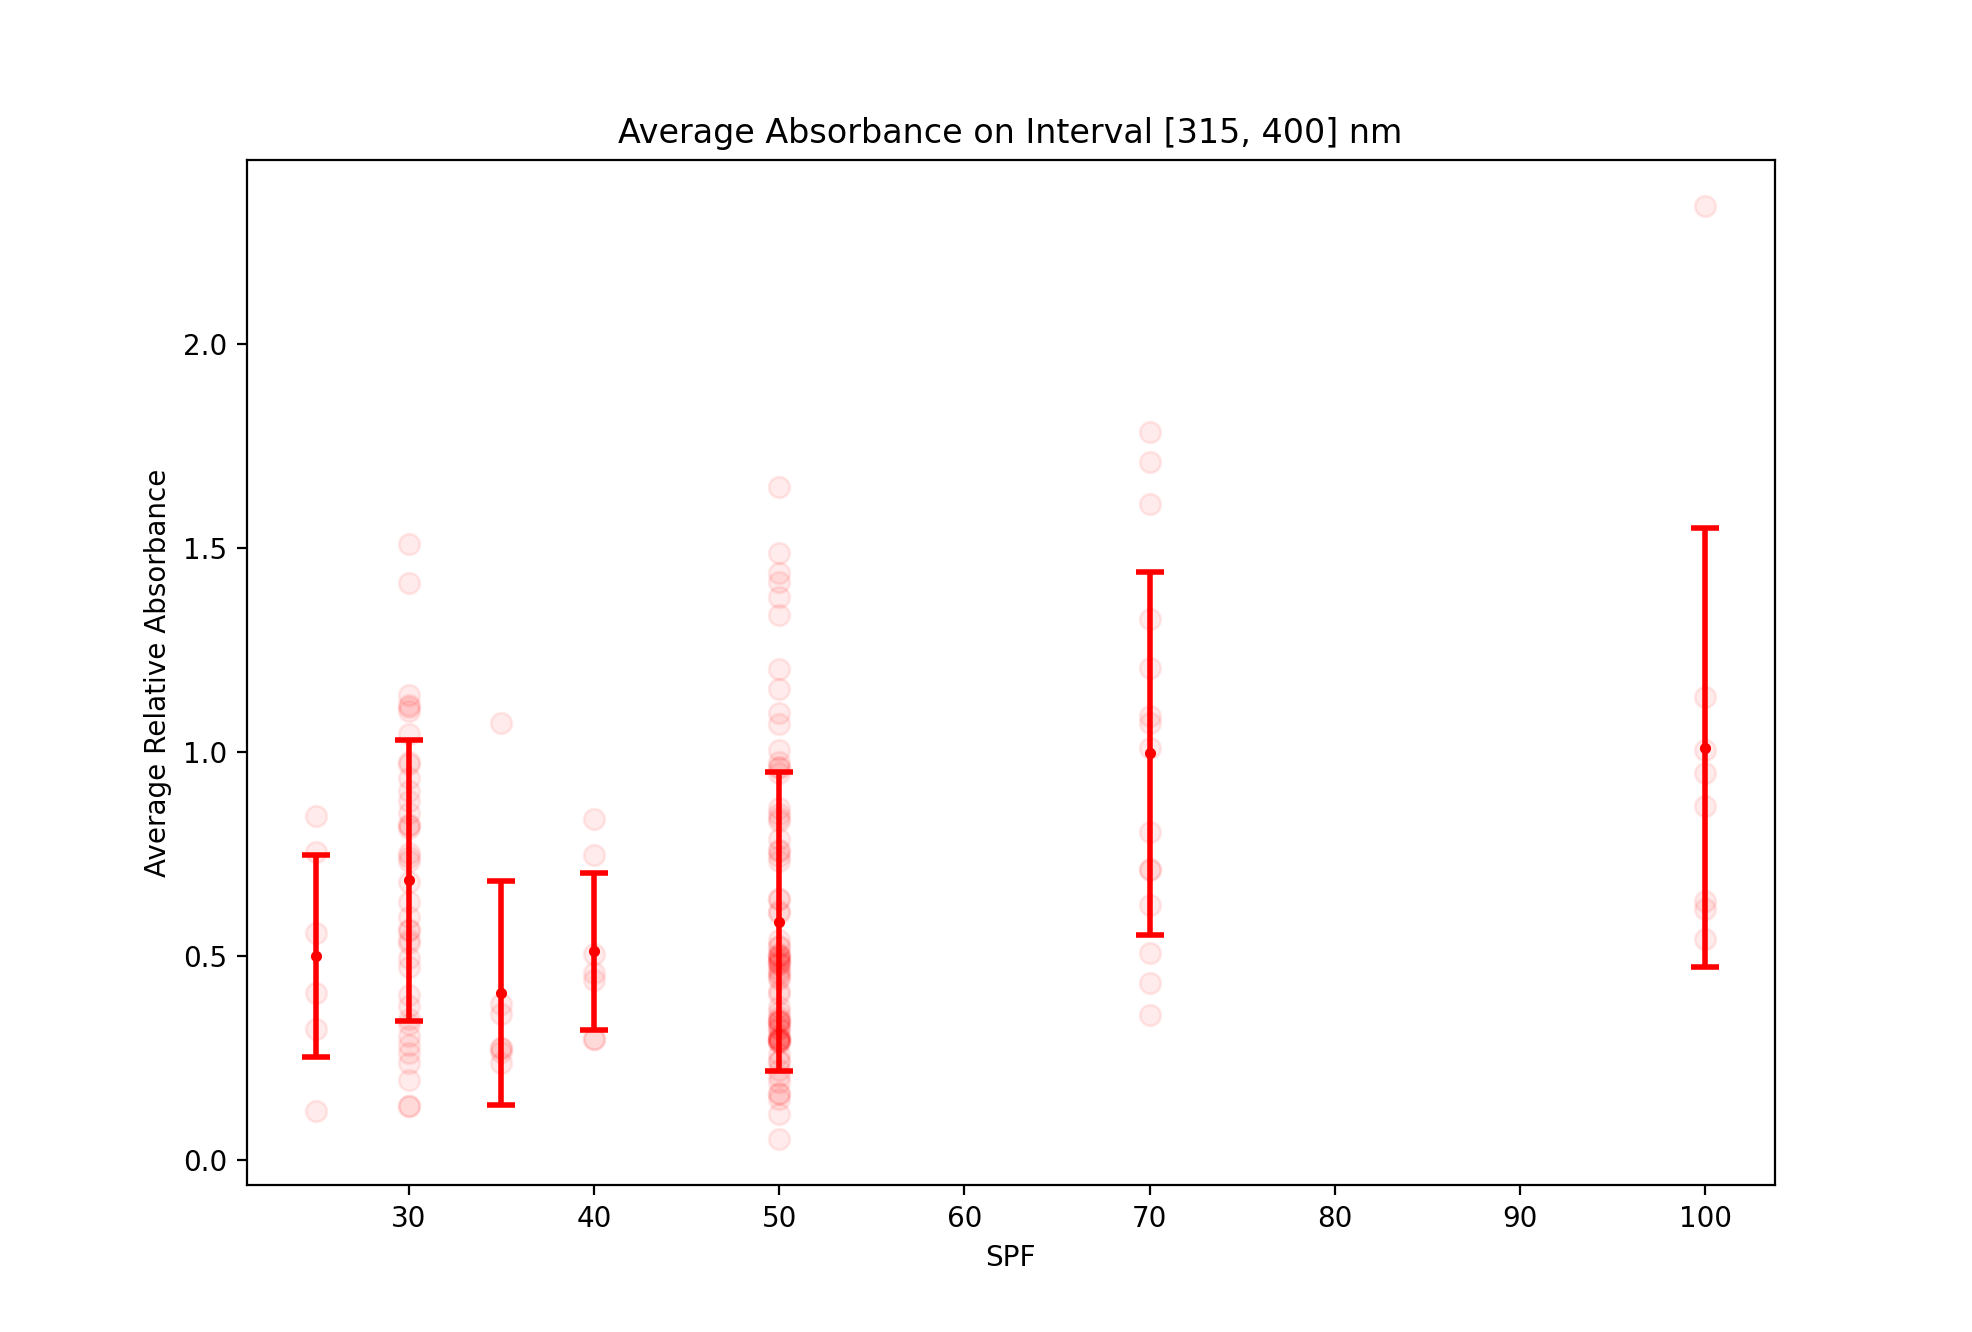

Text(0, 0.5, 'Average Relative Absorbance')

In [16]:
# Creating new visualization for absorbance on nm=[315, 400]
fig = plt.figure()

# Wavelength range
m2 = 315; n2 = 400

# Iterating through list of data sets and plotting
for f in csvs:
    try:
        x = find_SPF(f)
        y = avg_absorption(f, (m2, n2))
        plt.plot([x], [y], marker='o', c='r', markersize=7.5, alpha=0.08)
    except:
        print(f)
        
for SPF in num_SPFs(csvs):
    x3 = SPF
    y3 = avg_SPF_absorption(csvs, (m2,n2), SPF)[0]
    plt.plot(x3, y3, marker='o', c='r', markersize=3)
    plt.errorbar(x3, y3, yerr=avg_SPF_absorption(csvs, (m2,n2), SPF)[1], 
                 capsize=5, c='r', elinewidth=2, capthick=2)
    
# Making the plot informative
plt.title('Average Absorbance on Interval [{0}, {1}] nm'.format(m2, n2))
plt.xlabel('SPF')
plt.ylabel('Average Relative Absorbance')

$\quad$ In the data above there is a positive correlation between SPF and average UVB absorbance. This can be seen by considering the mean absorbances for each SPF. Similar to UVA absorption, there doesnt' seem to be a large positive correlation between SPF and UVB absorption at low SPF values.

### 4.
$\quad$ Finally we need to combine our results to construct a graphic which nicely illustrates our results. This illustration won't be too much different from the plots we've already created, but it will be geared more toward comparing data than just visualizing it. 

$\quad$ Similar to above, the mean absorbances for each SPF are plotted with their associated error bars, this time next to one another, slightly offset from the true SPF to not overlap with one another. This alone provides a good picture of how the different types of ultraviolet light are absorbed by different SPF values. In addition to this, a linear regression was run on the data to determine what sort of correlation existed. The coefficient of determination (also called the $R^2$ value) was found for each regression and printed below the plot. 

<IPython.core.display.Javascript object>


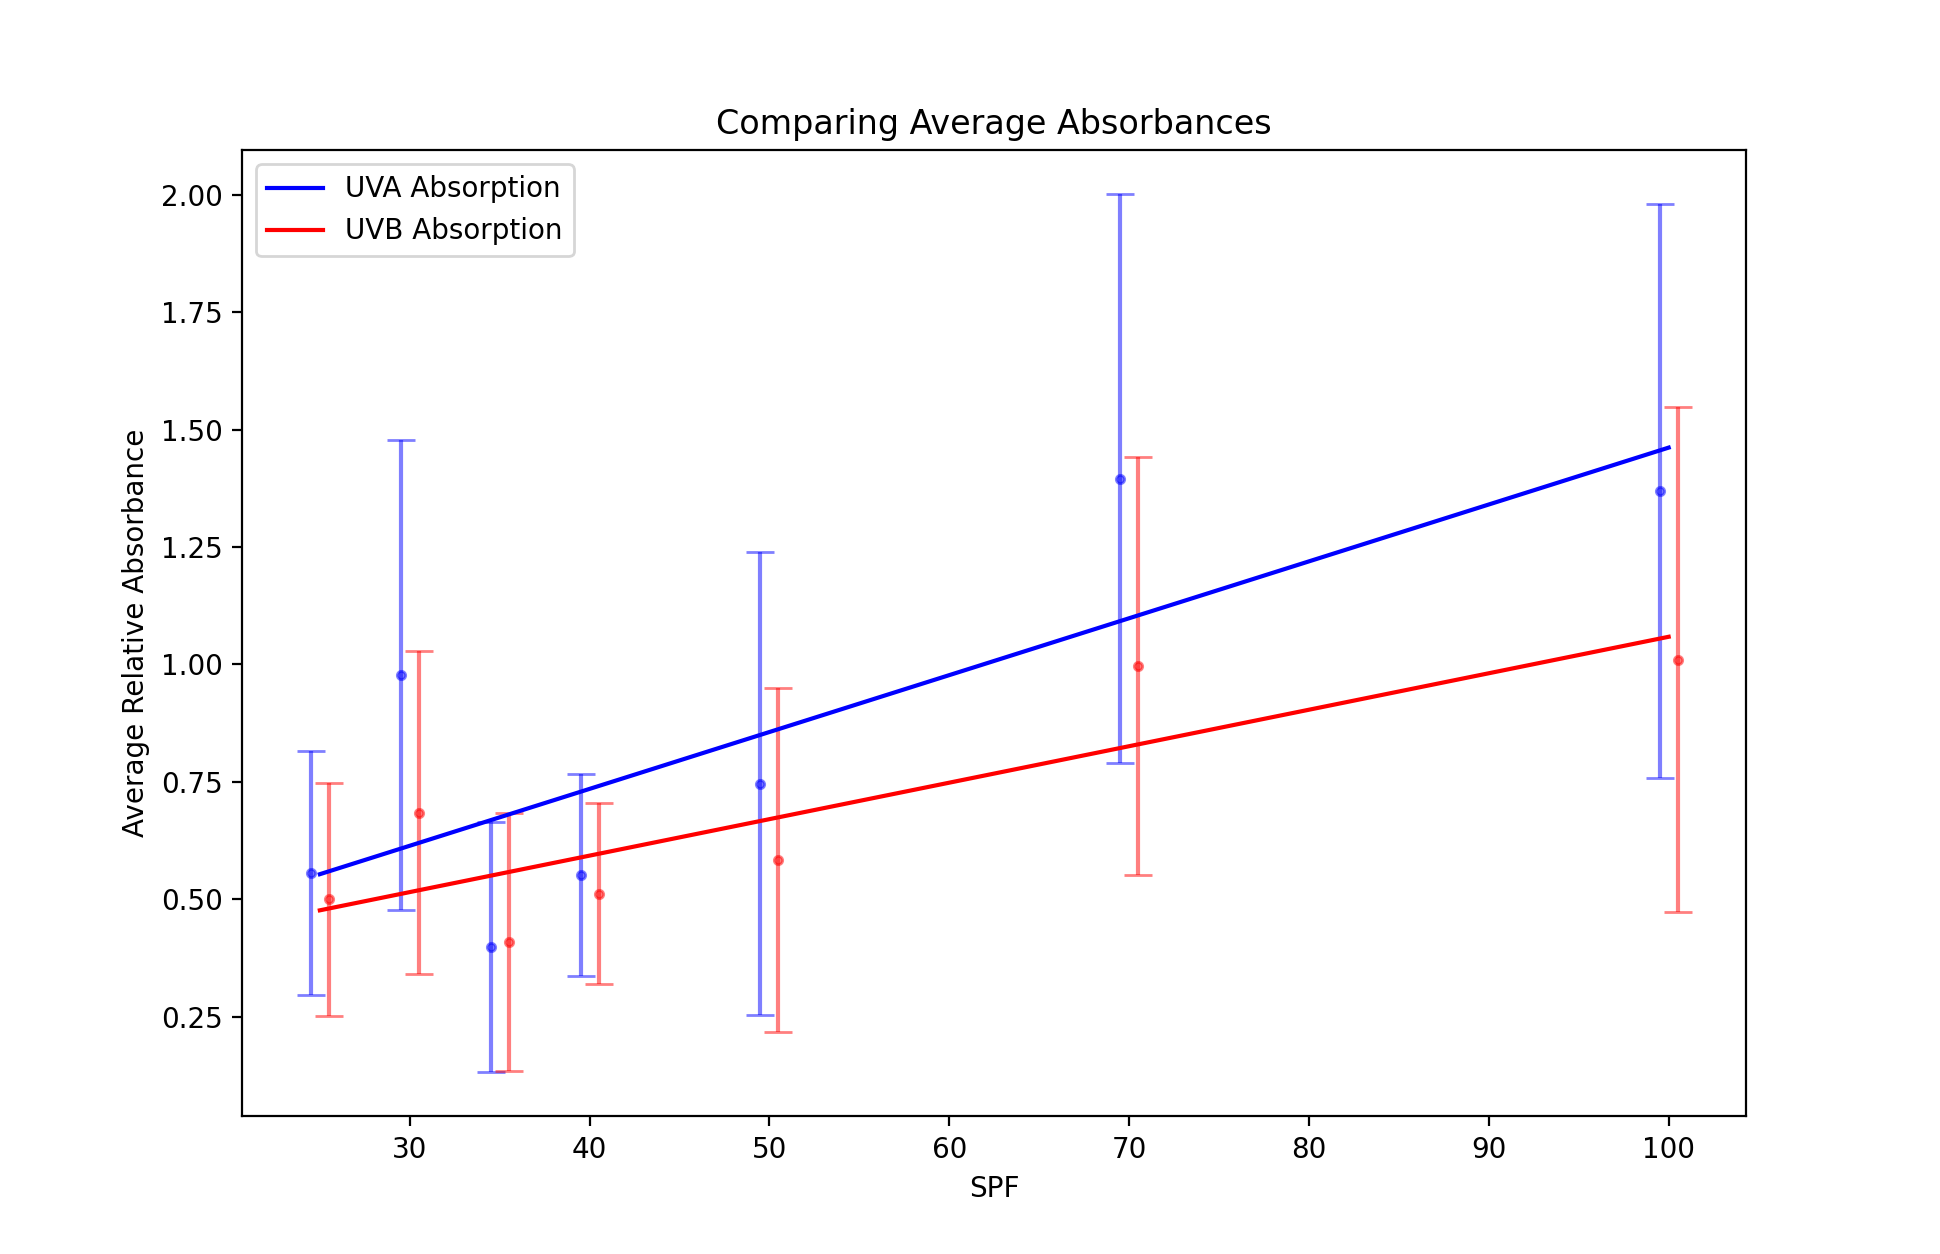

Coefficient of Determination for UVA Absorption: 0.640
Coefficient of Determination for UVA Absorption: 0.728


In [17]:
from scipy.stats import linregress

fig = plt.figure()

# Wavelength range(s)
m = 280; m2 = 315
n = 315; n2 = 400

# Lists to run linear regression on 
UVA = []
UVB = []
       
# Plotting the data for comparison
for SPF in num_SPFs(csvs):
    # x and y values
    xn = SPF-0.5; xns = SPF+0.5
    yn = avg_SPF_absorption(csvs, (m,n), SPF)[0]; yn2 = avg_SPF_absorption(csvs, (m2,n2), SPF)[0]
    UVA.append(yn); UVB.append(yn2) 
    
    # Means of each data set and associated error bars
    plt.plot(xn, yn, marker='o', c='b', markersize=3, alpha=0.5)
    plt.plot(xns, yn2, marker='o', c='r', markersize=3, alpha=0.5)
    plt.errorbar(xn, yn, yerr=avg_SPF_absorption(csvs, (m,n), SPF)[1], capsize=5, c='b', alpha=0.5)
    plt.errorbar(xns, yn2, yerr=avg_SPF_absorption(csvs, (m2,n2), SPF)[1], capsize=5, c='r', alpha=0.5)

# Linear regression
blue_curve = linregress(num_SPFs(csvs), UVA)
temp = [blue_curve[0]*h+blue_curve[1] for h in num_SPFs(csvs)]
red_curve = linregress(num_SPFs(csvs), UVB)
temp2 = [red_curve[0]*h+red_curve[1] for h in num_SPFs(csvs)]

# Plotting the linear regression so our work isn't in vein
plt.plot(num_SPFs(csvs), temp, c='b', label='UVA Absorption')
plt.plot(num_SPFs(csvs), temp2, c='r', label='UVB Absorption')

# Making the plot informative
plt.title('Comparing Average Absorbances')
plt.xlabel('SPF')
plt.ylabel('Average Relative Absorbance')
plt.legend()

print('Coefficient of Determination for UVA Absorption: {:0.3f}'.format(blue_curve[2]**2))
print('Coefficient of Determination for UVA Absorption: {:0.3f}'.format(red_curve[2]**2))

$\quad$ As we can see from the plot above, there is clearly some positive correlation between SPF and average ultraviolet absorbance. In fact, the $R^2$ values confirm this for us. Additionally, we used a linear regression because it made it easiest to visualize the trend in absorbance as SPF increases. In reality it's possible that the relationship between SPF and average absorbance is nonlinear but for our purposes a linear model works just fine.

$\quad$ Suprisingly (at least to me), this correlation is not as strong as one might expect, especially considering the closely related average absorbances of the lower SPF values. In the range of 20-50 SPF there is not a great increase in UV protection, aside from 30 SPF which does a better job than all other SPF values, on average. However, we do see a net increase in average absorbance for both UVA and UVB light as SPF increases.